In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [15]:
# Import CTGAN Synthetic data
synthetic_CTGAN = pd.read_csv("CTGAN_Pokemon.csv", encoding="UTF-8")
synthetic_CTGAN.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
0,sdv-pii-64jr8,Dragon,Ground,67,13,52,28,85,39,4,False,Stage1
1,sdv-pii-xnuld,Psychic,Dragon,5,58,66,41,21,86,2,False,Stage2
2,sdv-pii-23pgo,Ground,Flying,37,5,186,32,44,152,4,False,Stage1
3,sdv-pii-8mult,Bug,Steel,31,6,5,72,29,54,3,False,Basic
4,sdv-pii-pjbi7,Fire,Ground,49,46,130,183,28,99,4,True,Basic


In [16]:
# Import Gaussian Synthetic data
synthetic_Gaussian = pd.read_csv("Gaussian_Pokemon.csv", encoding="UTF-8")
synthetic_Gaussian.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
0,sdv-pii-64jr8,Normal,Steel,73,93,91,106,92,71,5,False,Stage1
1,sdv-pii-xnuld,Water,NaN,43,43,34,31,31,32,1,False,Basic
2,sdv-pii-23pgo,Ice,Flying,39,39,18,44,36,61,3,True,Basic
3,sdv-pii-8mult,Fire,NaN,118,103,129,100,84,71,1,False,Stage1
4,sdv-pii-pjbi7,Electric,NaN,69,65,62,68,53,89,3,False,Basic


In [17]:
# Import tensorflow Model Synthetic data
synthetic_tf = pd.read_csv("TF_Pokemon.csv", encoding="UTF-8")
synthetic_tf.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Generation,Type 1,Type 2,Evolution,Total
0,52.0,111.0,43.0,105.0,99.0,97.0,True,3,Normal,Electric,Mega,507.0
1,95.0,55.0,105.0,88.0,74.0,39.0,False,1,Grass,Fairy,Basic,456.0
2,56.0,111.0,43.0,106.0,96.0,39.0,True,1,Grass,Ground,Stage2,451.0
3,44.0,47.0,101.0,78.0,69.0,39.0,False,2,Bug,Normal,Basic,378.0
4,93.0,111.0,43.0,102.0,44.0,96.0,True,3,Poison,Bug,Mega,489.0


In [18]:
# Import real data
df = pd.read_csv("data\\pokemon_train_set.csv")
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,Basic
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,Stage1
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,Stage2
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,Mega
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,Basic


In [19]:
# Adding Total column for real and synthetic data
df['Total'] = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# synthetic_CTGAN
synthetic_CTGAN['Total'] = synthetic_CTGAN[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# synthetic_tf
synthetic_tf['Total'] = synthetic_tf[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)


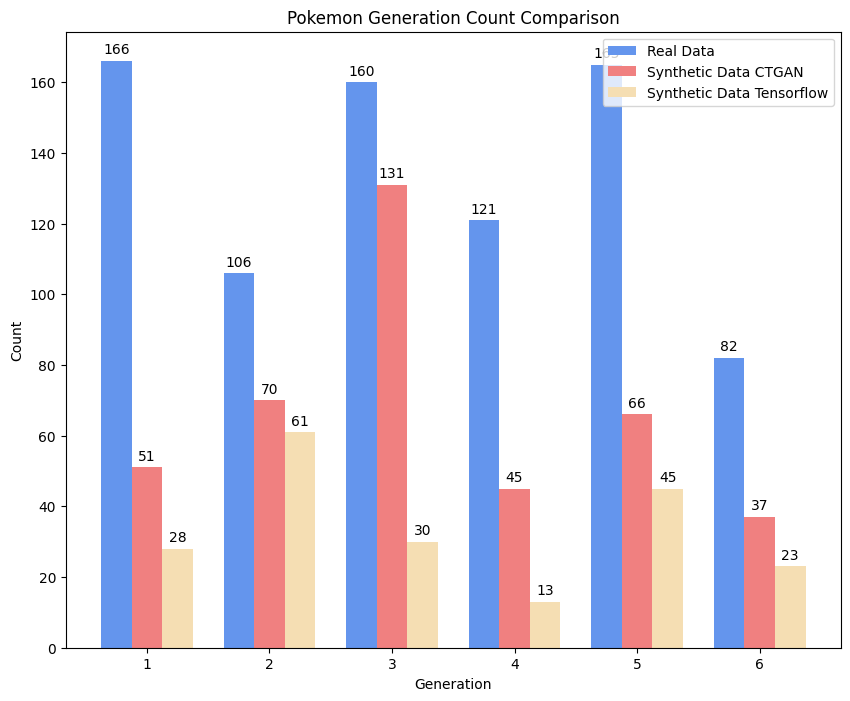

In [20]:
# Generate the counts for each type of data
generation_count_real = df['Generation'].value_counts().sort_index()
generation_count_synthetic = synthetic_CTGAN['Generation'].value_counts().sort_index()
generation_count_synthetic_tf = synthetic_tf['Generation'].value_counts().sort_index()

# Get a sorted union of all unique generations present in the data
all_generations = sorted(set(generation_count_real.index).union(
    set(generation_count_synthetic.index), set(generation_count_synthetic_tf.index)))

# Reindex the counts to include all generations, filling missing values with 0
generation_count_real = generation_count_real.reindex(all_generations, fill_value=0)
generation_count_synthetic = generation_count_synthetic.reindex(all_generations, fill_value=0)
generation_count_synthetic_tf = generation_count_synthetic_tf.reindex(all_generations, fill_value=0)

# Set the width of each bar
bar_width = 0.8

# Define the positions of the bars
index = np.arange(len(all_generations)) * (bar_width * 4)



# Create the bar chart
plt.figure(figsize=(10, 8))  # Adjust the figure size as necessary
real_bars = plt.bar(index, generation_count_real.values, bar_width, label='Real Data', color='cornflowerblue')
ctgan_bars = plt.bar(index + bar_width, generation_count_synthetic.values, bar_width, label='Synthetic Data CTGAN', color='lightcoral')
tf_bars = plt.bar(index + bar_width * 2, generation_count_synthetic_tf.values, bar_width, label='Synthetic Data Tensorflow', color='wheat')

# Add the text labels above the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(real_bars)
add_labels(ctgan_bars)
add_labels(tf_bars)

# Add title and axis labels
plt.title('Pokemon Generation Count Comparison')
plt.xlabel('Generation')
plt.ylabel('Count')

# Set the position of the x-axis ticks to be in the middle of the group of bars
plt.xticks(index + bar_width, all_generations)

# Add a legend
plt.legend()

# Show the plot
plt.show()


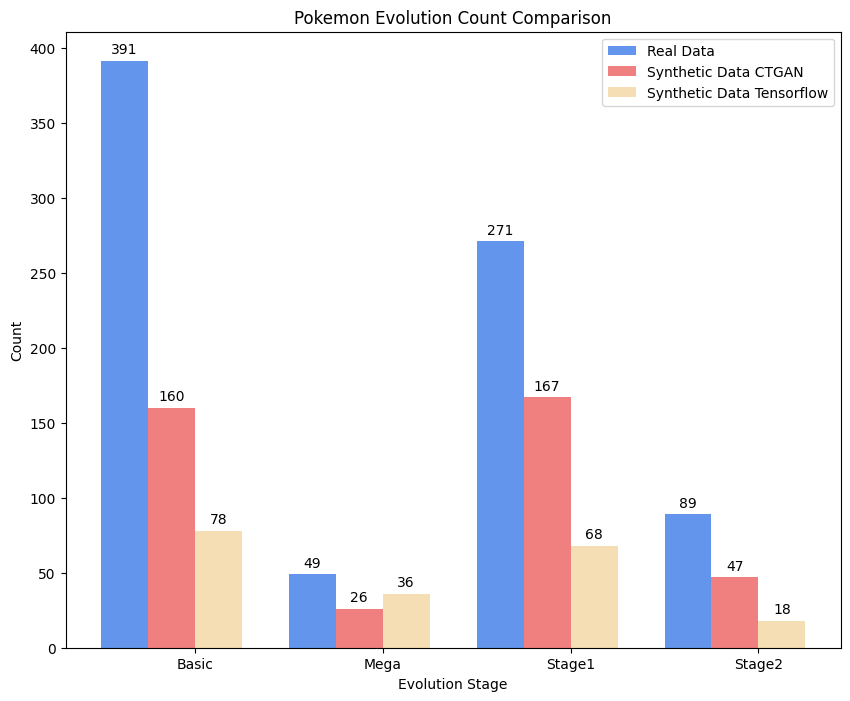

In [21]:
# Generate the counts for each type of data
evolution_count_real = df['Evolution'].value_counts().sort_index()
evolution_count_synthetic = synthetic_CTGAN['Evolution'].value_counts().sort_index()
evolution_count_synthetic_tf = synthetic_tf['Evolution'].value_counts().sort_index()

# Get a sorted union of all unique evolution stages present in the data
all_evolutions = sorted(set(evolution_count_real.index).union(
    set(evolution_count_synthetic.index), set(evolution_count_synthetic_tf.index)))

# Reindex the counts to include all evolution stages, filling missing values with 0
evolution_count_real = evolution_count_real.reindex(all_evolutions, fill_value=0)
evolution_count_synthetic = evolution_count_synthetic.reindex(all_evolutions, fill_value=0)
evolution_count_synthetic_tf = evolution_count_synthetic_tf.reindex(all_evolutions, fill_value=0)

# Define the positions of the bars
index = np.arange(len(all_evolutions)) * (bar_width * 4)

# Set the width of each bar
bar_width = 0.8

# Create the bar chart
plt.figure(figsize=(10, 8))  # Adjust the figure size as necessary
real_bars = plt.bar(index, evolution_count_real.values, bar_width, label='Real Data', color='cornflowerblue')
ctgan_bars = plt.bar(index + bar_width, evolution_count_synthetic.values, bar_width, label='Synthetic Data CTGAN', color='lightcoral')
tf_bars = plt.bar(index + bar_width * 2, evolution_count_synthetic_tf.values, bar_width, label='Synthetic Data Tensorflow', color='wheat')

# Add the text labels above the bars
def add_labels(bars, offset):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + offset, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(real_bars, bar_width / 2)
add_labels(ctgan_bars, bar_width / 2)
add_labels(tf_bars, bar_width /2)

# Add title and axis labels
plt.title('Pokemon Evolution Count Comparison')
plt.xlabel('Evolution Stage')
plt.ylabel('Count')

# Set the position of the x-axis ticks to be in the middle of the group of bars
plt.xticks(index + bar_width * 1.5, all_evolutions)

# Add a legend
plt.legend()

# Show the plot
plt.show()


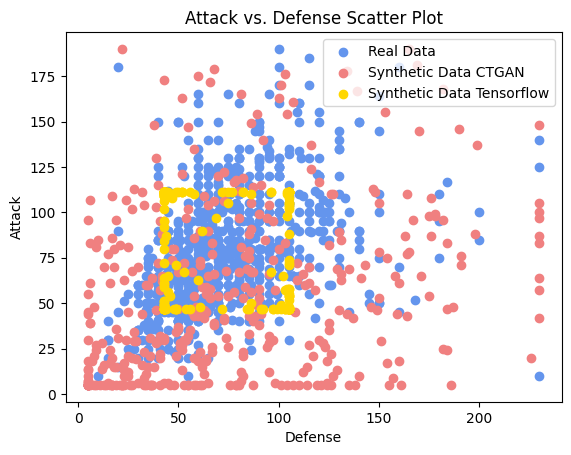

In [22]:
# Scatterplot for real data
plt.scatter(df['Defense'], df['Attack'], color='cornflowerblue', label='Real Data')

# Scatterplot for for synthetic data CTGAN
plt.scatter(synthetic_CTGAN['Defense'], synthetic_CTGAN['Attack'], color='lightcoral', label='Synthetic Data CTGAN')

# Scatterplot for synthetic data tf
plt.scatter(synthetic_tf['Defense'], synthetic_tf['Attack'], color='gold', label='Synthetic Data Tensorflow')

# Add title and axis lable
plt.title('Attack vs. Defense Scatter Plot')
plt.xlabel('Defense')
plt.ylabel('Attack')

# Add legend
plt.legend()

# Show diagram
plt.show()


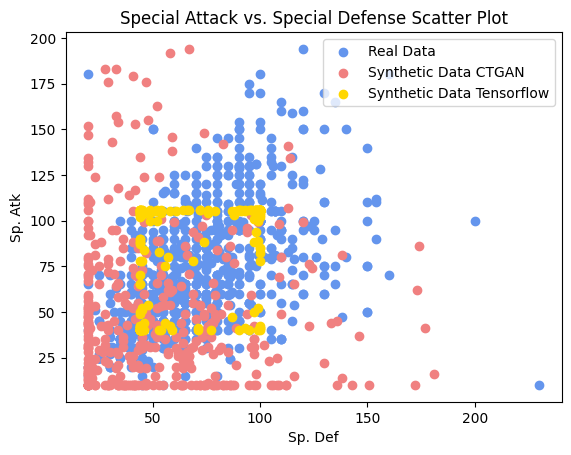

In [23]:
# Scatterplot for real data
plt.scatter(df['Sp. Def'], df['Sp. Atk'], color='cornflowerblue', label='Real Data')

# Scatterplot for synthetic data CTGAN
plt.scatter(synthetic_CTGAN['Sp. Def'], synthetic_CTGAN['Sp. Atk'], color='lightcoral', label='Synthetic Data CTGAN')

# Scatterplot for synthetic data tf
plt.scatter(synthetic_tf['Sp. Def'], synthetic_tf['Sp. Atk'], color='gold', label='Synthetic Data Tensorflow')

# Add title and axis lables
plt.title('Special Attack vs. Special Defense Scatter Plot')
plt.xlabel('Sp. Def')
plt.ylabel('Sp. Atk')

# Add lengend
plt.legend()

# Add diagram
plt.show()


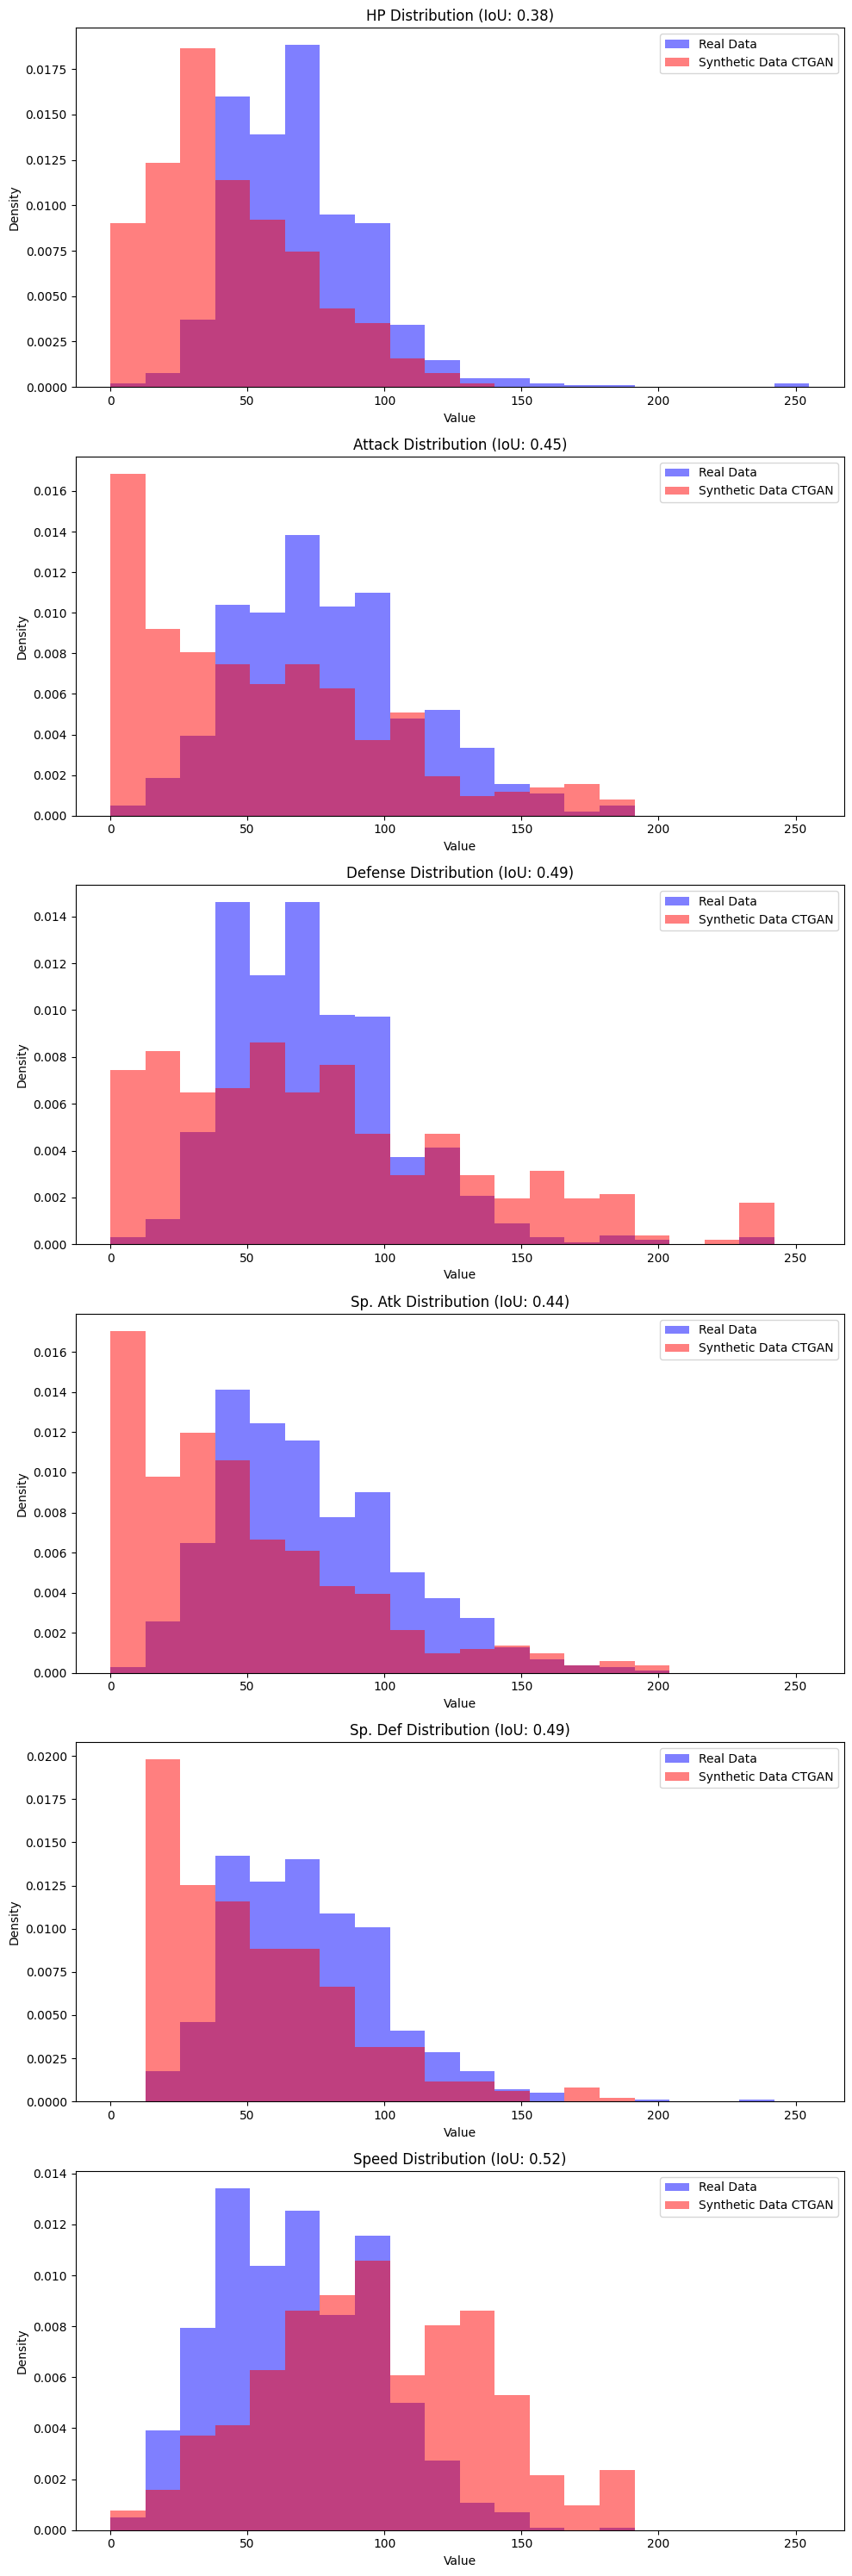

IoU for HP: 0.38
IoU for Attack: 0.45
IoU for Defense: 0.49
IoU for Sp. Atk: 0.44
IoU for Sp. Def: 0.49
IoU for Speed: 0.52


In [24]:
#CTGAN
# List features to compare
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Replace NaN with 'none'
df_non_numeric = df[features].fillna('none')
synthetic_CTGAN_non_numeric = synthetic_CTGAN[features].fillna('none')

# Fill Nan with 0
df_numeric = df[features].fillna(0)
synthetic_CTGAN_numeric = synthetic_CTGAN[features].fillna(0)

# Define Bins
bins = np.linspace(0, max(df_numeric.max().max(), synthetic_CTGAN_numeric.max().max()), 21)

# Generate IoU and Histogram
iou_scores = []
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 5 * len(features)))

for i, feature in enumerate(features):
    real_hist, _ = np.histogram(df_numeric[feature], bins=bins, density=True)
    synthetic_hist, _ = np.histogram(synthetic_CTGAN_numeric[feature], bins=bins, density=True)
    intersection = np.minimum(real_hist, synthetic_hist).sum()
    union = np.maximum(real_hist, synthetic_hist).sum()
    iou = intersection / union
    iou_scores.append(iou)

    axes[i].hist(df_numeric[feature], bins=bins, alpha=0.5, label='Real Data', color='blue', density=True)
    axes[i].hist(synthetic_CTGAN_numeric[feature], bins=bins, alpha=0.5, label='Synthetic Data CTGAN', color='red', density=True)
    axes[i].set_title(f'{feature} Distribution (IoU: {iou:.2f})')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print IoU for every Feature
for feature, score in zip(features, iou_scores):
    print(f'IoU for {feature}: {score:.2f}')


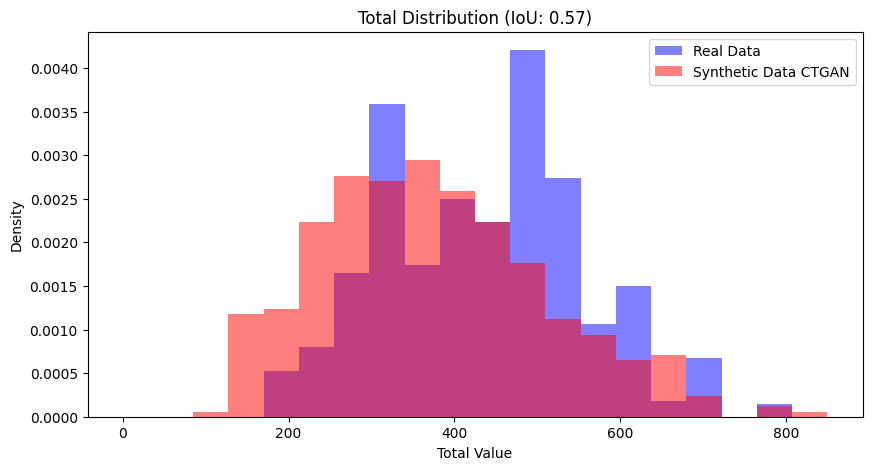

IoU for Total: 0.57


In [25]:
# Define Bins
bins = np.linspace(0, max(df["Total"].max(), synthetic_CTGAN["Total"].max()), 21)

# Calculate Histogram and IoU
real_hist, _ = np.histogram(df["Total"], bins=bins, density=True)
synthetic_hist, _ = np.histogram(synthetic_CTGAN["Total"], bins=bins, density=True)

intersection = np.minimum(real_hist, synthetic_hist).sum()
union = np.maximum(real_hist, synthetic_hist).sum()
iou = intersection / union

# Plotting
plt.figure(figsize=(10, 5))
plt.hist(df["Total"], bins=bins, alpha=0.5, label='Real Data', color='blue', density=True)
plt.hist(synthetic_CTGAN["Total"], bins=bins, alpha=0.5, label='Synthetic Data CTGAN', color='red', density=True)
plt.title(f'Total Distribution (IoU: {iou:.2f})')
plt.xlabel('Total Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# print IoU
print(f'IoU for Total: {iou:.2f}')


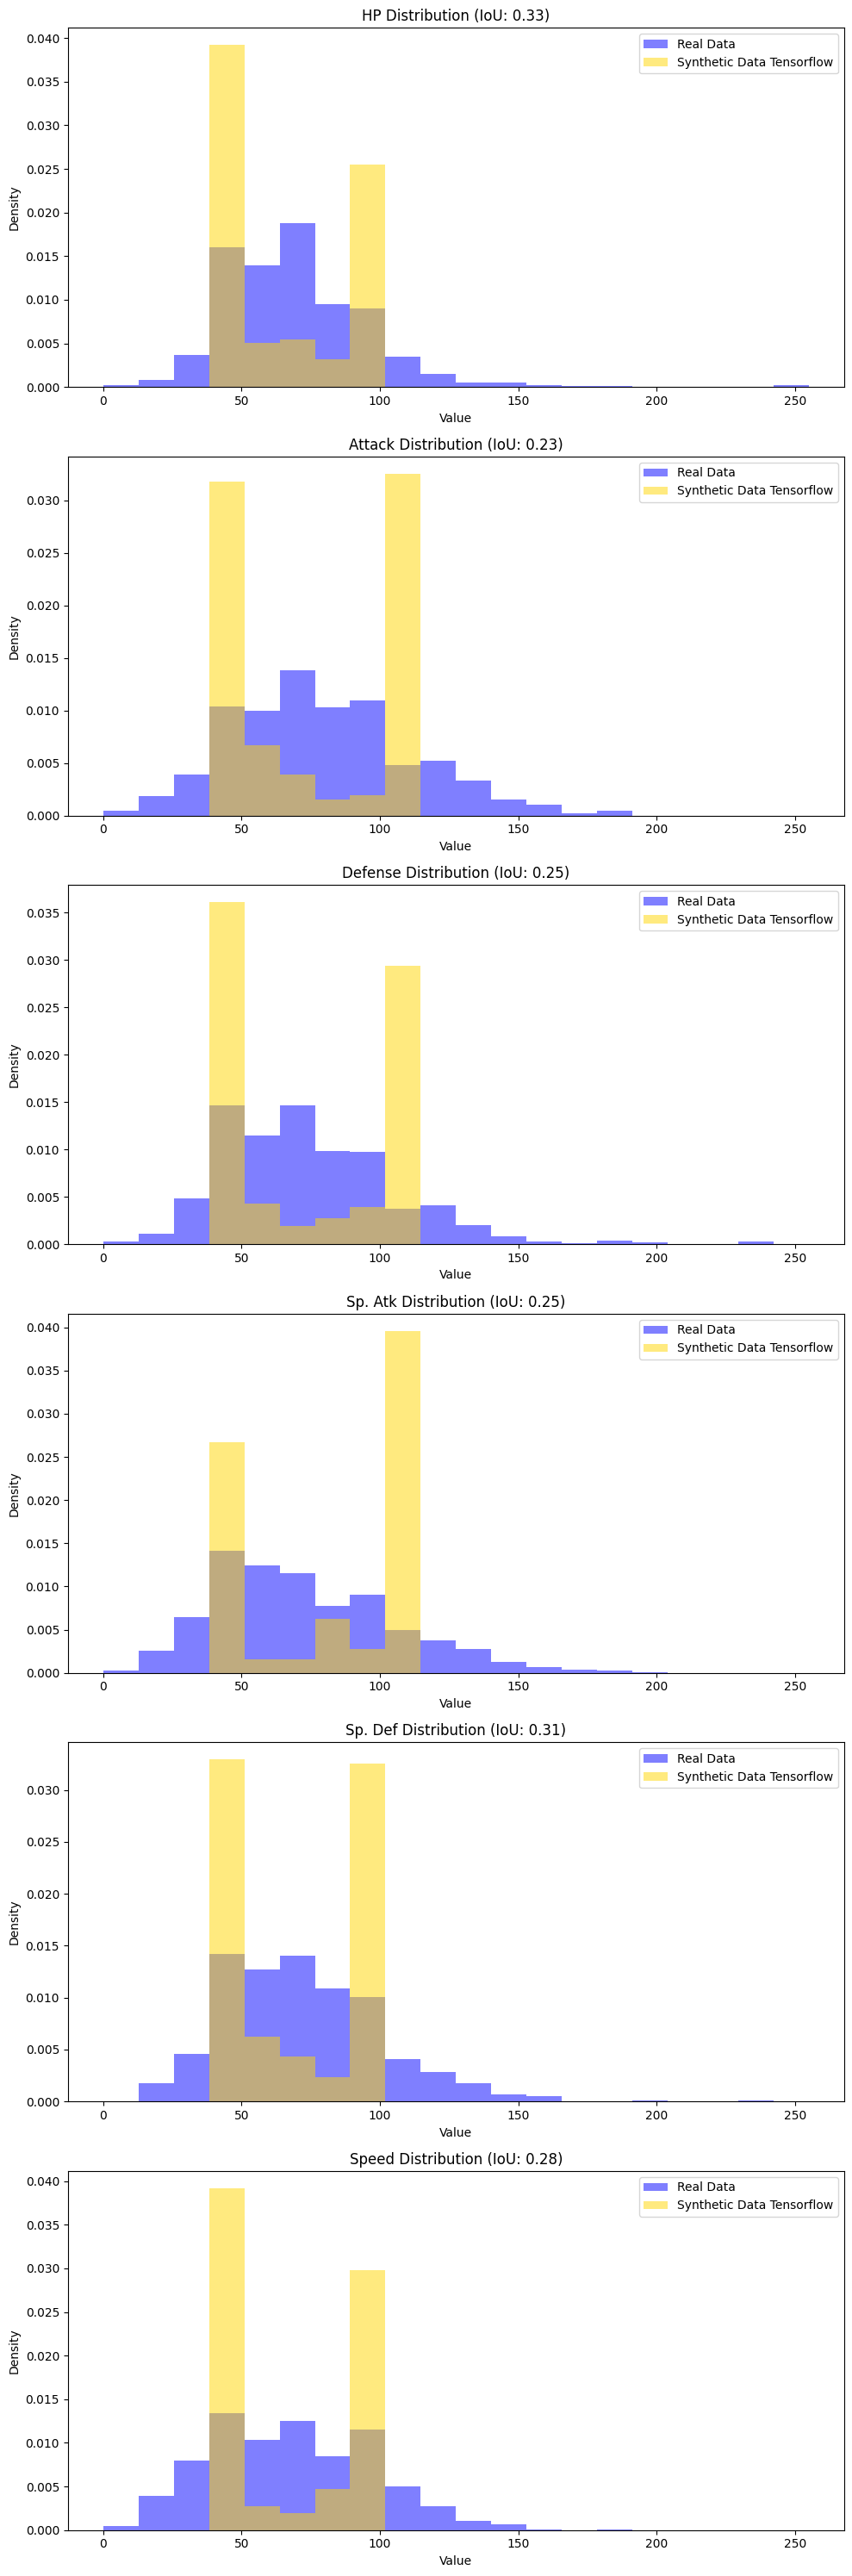

IoU for HP: 0.33
IoU for Attack: 0.23
IoU for Defense: 0.25
IoU for Sp. Atk: 0.25
IoU for Sp. Def: 0.31
IoU for Speed: 0.28


In [26]:
# TF
# List features to compare
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Replace NaN with 'none'
df_non_numeric = df[features].fillna('none')
synthetic_CTGAN_non_numeric = synthetic_tf[features].fillna('none')

# Fill Nan with 0
df_numeric = df[features].fillna(0)
synthetic_tf_numeric = synthetic_tf[features].fillna(0)

# Define Bins
bins = np.linspace(0, max(df_numeric.max().max(), synthetic_tf_numeric.max().max()), 21)

# Generate IoU and Histogram
iou_scores = []
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 5 * len(features)))

for i, feature in enumerate(features):
    real_hist, _ = np.histogram(df_numeric[feature], bins=bins, density=True)
    synthetic_hist, _ = np.histogram(synthetic_tf_numeric[feature], bins=bins, density=True)
    intersection = np.minimum(real_hist, synthetic_hist).sum()
    union = np.maximum(real_hist, synthetic_hist).sum()
    iou = intersection / union
    iou_scores.append(iou)

    axes[i].hist(df_numeric[feature], bins=bins, alpha=0.5, label='Real Data', color='blue', density=True)
    axes[i].hist(synthetic_tf_numeric[feature], bins=bins, alpha=0.5, label='Synthetic Data Tensorflow', color='gold', density=True)
    axes[i].set_title(f'{feature} Distribution (IoU: {iou:.2f})')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print IoU for every Feature
for feature, score in zip(features, iou_scores):
    print(f'IoU for {feature}: {score:.2f}')


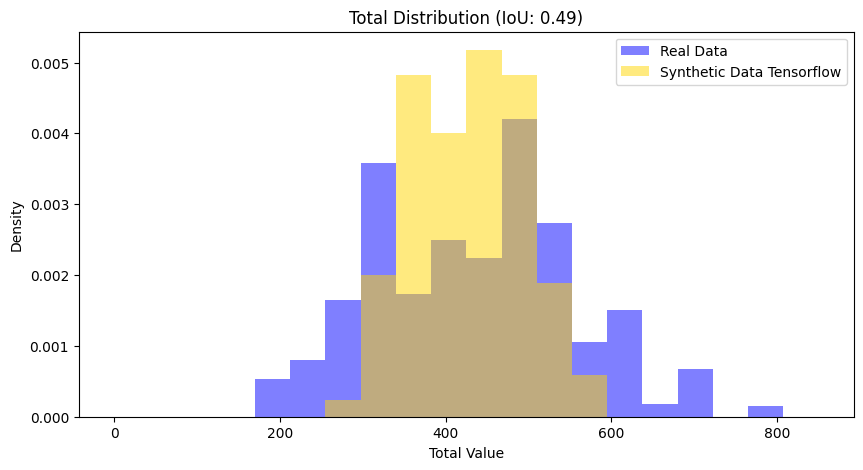

IoU for Total: 0.49


In [27]:
# TF
# Define Bins
bins = np.linspace(0, max(df["Total"].max(), synthetic_CTGAN["Total"].max()), 21)

# Calculate Histogram and IoU
real_hist, _ = np.histogram(df["Total"], bins=bins, density=True)
synthetic_hist, _ = np.histogram(synthetic_tf["Total"], bins=bins, density=True)

intersection = np.minimum(real_hist, synthetic_hist).sum()
union = np.maximum(real_hist, synthetic_hist).sum()
iou = intersection / union

# Plotting
plt.figure(figsize=(10, 5))
plt.hist(df["Total"], bins=bins, alpha=0.5, label='Real Data', color='blue', density=True)
plt.hist(synthetic_tf["Total"], bins=bins, alpha=0.5, label='Synthetic Data Tensorflow', color='gold', density=True)
plt.title(f'Total Distribution (IoU: {iou:.2f})')
plt.xlabel('Total Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# print IoU
print(f'IoU for Total: {iou:.2f}')
